In [1]:
import requests
import io
import pandas as pd
import json
import urllib.request
import lxml
from bs4 import BeautifulSoup
url = 'file:///home/kirugulige/table.html'


In [2]:
df = pd.read_html(url,encoding = 'utf-8')[0] # encoding = utf-8 for word like Piqué [é]

In [3]:
players = df[['Name','Age','Unnamed: 6']]

In [4]:
players = players.rename(columns={'Unnamed: 6' : 'Minutes Played'})

In [5]:
max_minute = players['Minutes Played'].max()

In [6]:
percentile = []
for i in range(len(players)):
    percentile.append((players.iloc[i]['Minutes Played']/max_minute)*100)


In [7]:
players['Percentile'] = percentile

In [8]:
players.head()

,Name,Age,Minutes Played,Percentile
0,M. ter Stegen,27,3150,100.000000
1,J. Cillessen,30,270,8.571429
2,Iñaki Peña,20,0,0.000000
3,Jokin Ezkieta,22,0,0.000000
4,Nélson Semedo,25,1601,50.825397


In [9]:
# variable to knowif player just joined
year_at_club = [1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0]

In [10]:
#len(year_at_club)
players['years'] = year_at_club

In [11]:
players.head()

,Name,Age,Minutes Played,Percentile,years
0,M. ter Stegen,27,3150,100.000000,1
1,J. Cillessen,30,270,8.571429,1
2,Iñaki Peña,20,0,0.000000,0
3,Jokin Ezkieta,22,0,0.000000,0
4,Nélson Semedo,25,1601,50.825397,1


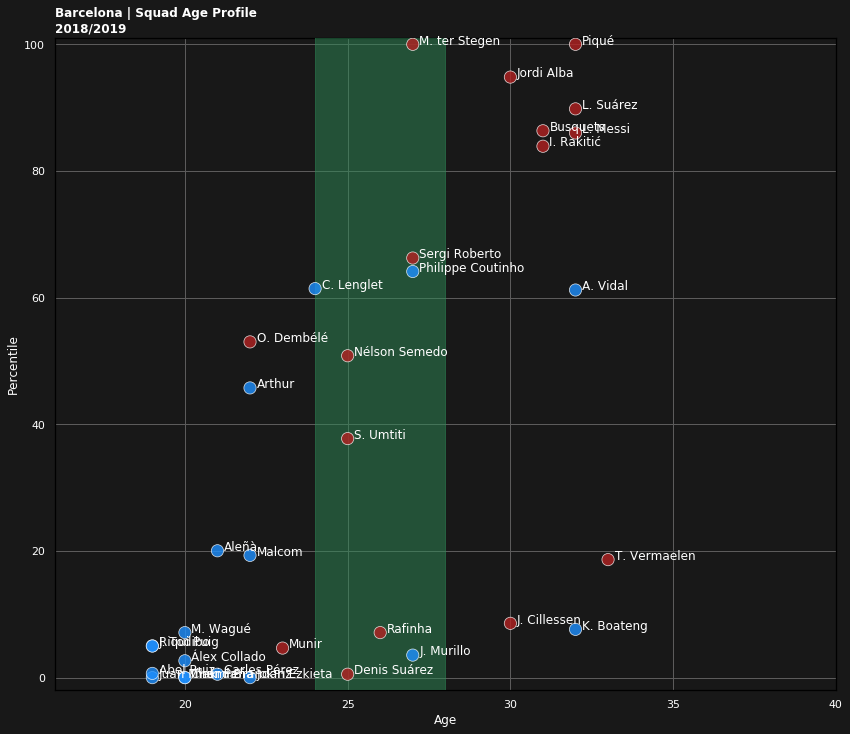

In [13]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch

a4_dims = (14 ,12)
bg = "#181818"
flatui = ['dodgerblue','firebrick']

#player = sns.load_dataset("players")
sns.set(rc={ 'grid.color': '#5c5b5b','grid.linestyle': '-','axes.edgecolor': '#000000','axes.facecolor':bg, 'figure.facecolor':bg,'ytick.color':'white','xtick.color':'white' ,'axes.labelcolor': 'white',})

#initialize
fig, ax = plt.subplots(figsize=a4_dims)

#draw the green rectangle and add to plot
rect = Rectangle([24,-2], width = 4, height = 104, fill = True,color="seagreen",zorder=5,alpha=0.5)
ax.add_patch(rect)

#add scatter points
ax = sns.scatterplot(x="Age", y="Percentile",palette = flatui, data=players,s=150,legend = False,alpha=0.8,zorder =8,hue = 'years')
plt.ylim(-2, 101)
plt.xlim(16, 40)
plt.title('Barcelona | Squad Age Profile \n2018/2019',color = 'white',loc = 'left',fontweight = 'semibold')

#add anotations
for line in range(len(players)):
     ax.text(players.iloc[line]['Age']+0.2, players.iloc[line]['Percentile'], players.iloc[line]['Name'], horizontalalignment='left', size='medium', color='white',zorder = 8)

#firebrick